In [1]:
#Installing Bing Image Downloader
!pip install bing-image-downloader

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 1.31 ms (started: 2021-03-30 15:59:49 +00:00)


In [3]:
!mkdir  Images

time: 115 ms (started: 2021-03-30 15:59:49 +00:00)


In [4]:
from bing_image_downloader import downloader
import pandas as pd
import numpy as np

time: 11.5 ms (started: 2021-03-30 15:59:49 +00:00)


In [5]:
downloader.download("Choclate Cupcake", limit= 50, output_dir="Images")
downloader.download("Ironman Cartoon", limit=50, output_dir="Images")
downloader.download("Smiley Ball",limit=50,output_dir='Images')




[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://cdn.sallysbakingaddiction.com/wp-content/uploads/2014/06/best-chocolate-cupcakes.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.mypetsname.com/wp-content/uploads/2019/12/Male-Brown-Lab.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.webstaurantstore.com/images/products/extra_large/211433/951013.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.handletheheat.com/wp-content/uploads/2016/02/Best-Chocolate-Cupcakes-01.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.lemonsforlulu.com/wp-content/uploads/2014/03/Candy-Land-Cupcakes-5.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.lifeloveandsugar.com/wp-content/uploads/2015/03/Moist_Chocolate_Cupcakes7.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://triedandtasty.com/wp-content/uploads/2016/05/Chocolate-Frosted-Donuts-with-Sprinkl

In [6]:
#Preprocessing
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

time: 1.12 s (started: 2021-03-30 16:01:09 +00:00)


In [7]:
target=[]
flat_data=[]
images=[]

time: 1.91 ms (started: 2021-03-30 16:01:10 +00:00)


In [8]:
DATADIR='/content/Images'
CATEGORIES=['Choclate Cupcake','Ironman Cartoon','Smiley Ball']

time: 1.63 ms (started: 2021-03-30 16:01:10 +00:00)


In [9]:
for category in CATEGORIES:
  print(category)

Choclate Cupcake
Ironman Cartoon
Smiley Ball
time: 3.69 ms (started: 2021-03-30 16:01:10 +00:00)


In [10]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  print(class_num)
  path = os.path.join(DATADIR,category)
  print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    image_resized = resize(img_array,(150,150,3))
    flat_data.append(image_resized.flatten())
    target.append(class_num)
    images.append(image_resized)
 
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

0
/content/Images/Choclate Cupcake
1
/content/Images/Ironman Cartoon
2
/content/Images/Smiley Ball
time: 49.5 s (started: 2021-03-30 16:01:10 +00:00)


In [11]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
1,0.772549,0.882353,0.792157,0.772549,0.882353,0.792157,0.768627,0.882353,0.792157,0.764706,0.882353,0.792157,0.760784,0.882353,0.788235,0.756863,0.882353,0.788235,0.754902,0.880392,0.786275,0.752941,0.878431,0.784314,0.750980,0.876471,0.782353,0.749020,0.874510,0.780392,0.747059,0.874510,0.780392,0.745098,0.872549,0.778431,0.745098,0.870588,0.776471,0.743137,...,0.815686,0.835294,0.811765,0.815686,0.835294,0.815686,0.819608,0.839216,0.819608,0.819608,0.839216,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.827451,0.847059,0.823529,0.827451,0.847059,0.823529,0.827451,0.847059,0.823529,0.827451,0.847059,0.823529,0
2,0.772549,0.882353,0.792157,0.772549,0.882353,0.792157,0.768627,0.882353,0.792157,0.764706,0.882353,0.792157,0.760784,0.882353,0.788235,0.756863,0.882353,0.788235,0.754902,0.880392,0.786275,0.752941,0.878431,0.784314,0.750980,0.876471,0.782353,0.749020,0.874510,0.780392,0.747059,0.874510,0.780392,0.745098,0.872549,0.778431,0.745098,0.870588,0.776471,0.743137,...,0.815686,0.835294,0.811765,0.815686,0.835294,0.815686,0.819608,0.839216,0.819608,0.819608,0.839216,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.823529,0.843137,0.819608,0.827451,0.847059,0.823529,0.827451,0.847059,0.823529,0.827451,0.847059,0.823529,0.827451,0.847059,0.823529,0
3,0.894118,0.909804,0.905882,0.894118,0.909804,0.905882,0.898039,0.913725,0.909804,0.901961,0.917647,0.913725,0.899020,0.914706,0.910784,0.896078,0.911765,0.907843,0.901961,0.917647,0.913725,0.901961,0.917647,0.913725,0.905882,0.917647,0.917647,0.901961,0.917647,0.913725,0.901961,0.917647,0.913725,0.901961,0.917647,0.913725,0.901961,0.917647,0.913725,0.901961,...,0.776471,0.800000,0.792157,0.776471,0.800000,0.792157,0.774510,0.798039,0.790196,0.776471,0.800000,0.792157,0.780065,0.803595,0.795752,0.779412,0.802941,0.795098,0.776471,0.800000,0.792157,0.775817,0.799346,0.791503,0.765686,0.789216,0.781373,0.771895,0.795425,0.787582,0.772876,0.796405,0.788562,0.773529,0.797059,0.789216,0.772549,0.796078,0.788235,0
4,0.874510,0.898039,0.945098,0.874510,0.901961,0.945098,0.878431,0.905882,0.945098,0.886275,0.913725,0.947059,0.889216,0.916667,0.954902,0.891176,0.918627,0.957843,0.892157,0.919608,0.958824,0.894118,0.921569,0.960784,0.890196,0.917647,0.956863,0.890196,0.917647,0.956863,0.890196,0.917647,0.956863,0.890196,0.917647,0.956863,0.890196,0.921569,0.958824,0.896078,...,0.901961,0.941176,0.994118,0.901961,0.945098,0.996078,0.905882,0.945098,0.996078,0.905882,0.949020,0.996078,0.907843,0.949020,0.996078,0.909804,0.949020,0.996078,0.909804,0.949020,0.996078,0.909804,0.947059,0.995098,0.911765,0.945098,0.994118,0.913725,0.945098,0.994118,0.909804,0.945098,0.992157,0.900980,0.933333,0.990196,0.876471,0.908824,0.970588,0


time: 157 ms (started: 2021-03-30 16:02:00 +00:00)


In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 6.03 ms (started: 2021-03-30 16:02:00 +00:00)


In [13]:
# Spliting  the data into training data and tesing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (flat_data, target, test_size=0.3, random_state=0, stratify=target)


time: 240 ms (started: 2021-03-30 16:02:00 +00:00)


In [14]:
#SVM Classifier 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[0.1,1,10,100,1000],'kernel':['linear']},{'C':[0.1,1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

svc_model = svm.SVC(probability =True)

grid_clf = GridSearchCV (svc_model,param_grid,cv=5,refit=True)
grid_clf.fit (x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 4min 4s (started: 2021-03-30 16:02:00 +00:00)


In [15]:
y_pred = grid_clf.predict(x_test)
y_pred

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2])

time: 189 ms (started: 2021-03-30 16:06:04 +00:00)


In [16]:
y_test

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2])

time: 5.84 ms (started: 2021-03-30 16:06:05 +00:00)


In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


time: 1.43 ms (started: 2021-03-30 16:06:05 +00:00)


In [18]:
print(accuracy_score(y_pred,y_test))

0.9555555555555556
time: 1.56 ms (started: 2021-03-30 16:06:05 +00:00)


In [19]:
confusion_matrix(y_pred,y_test)

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 15]])

time: 7.6 ms (started: 2021-03-30 16:06:05 +00:00)


In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      1.00      0.93        13
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

time: 13.6 ms (started: 2021-03-30 16:06:05 +00:00)


In [21]:
import pickle 
pickle.dump(grid_clf,open('model.p','wb'))

time: 37.9 ms (started: 2021-03-30 16:06:05 +00:00)


In [22]:
final_model = pickle.load(open('model.p','rb'))

time: 16 ms (started: 2021-03-30 16:06:05 +00:00)


Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Chocolate_Cupcakes.jpg/1024px-Chocolate_Cupcakes.jpg
PREDICTED OUTPUT:Choclate Cupcake


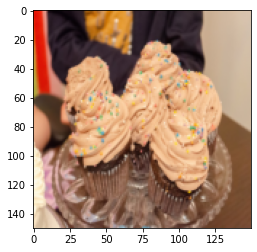

time: 33.4 s (started: 2021-03-30 16:06:05 +00:00)


In [23]:
flat_test_data =[]                                           
url = input('Enter your URL')
img_test =imread(url)
image_test_resized = resize(img_test,(150,150,3))
flat_test_data.append(image_test_resized.flatten())
flat_test_data = np.array(flat_test_data)
plt.imshow(image_test_resized)
y_out = final_model.predict(flat_test_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [24]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.0MB 8.1MB/s 
     |████████████████████████████████| 4.6MB 42.6MB/s 
     |████████████████████████████████| 112kB 49.3MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 163kB 57.8MB/s 
     |████████████████████████████████| 122kB 54.2MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=03e11d30c950f3ef97ac9ee847490fb3a0dd4d1821d86483affd181d4ac506cb
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=14e39b0c3a5223ea999ffbdcdc3f80a82774e01a5aefe4fd2a0e5de3094c87f7
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok
time: 18.3 s (started: 2021-03-30 16:06:51 +00:00)


In [25]:
%%writefile shape_app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.tranform import resize
import pickle 
from PIL import Image 
st.title('Image Classification Using Machine Learning Algorithm')
st.text("Upload the Image")

uplaoded_file = st.file_uploader("Choose an Image", type = (["jpg","png"]))
if uplaoded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('Predict'):
    st.write('Result .. ')
    flat_test_data=[]
    img = np.array(img)
    image_test_resized = resize(img_test,(150,150,3))
    flat_test_data.append(image_test_resized.flatten())
    flat_test_data = np.array(flat_test_data)
    y_out = final_model.predict(flat_test_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out} ')
    q = final_model.predic_proba(flat_test_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f' {item} : {a[0][index]*100}%')

Writing shape_app.py
time: 4.4 ms (started: 2021-03-30 16:07:09 +00:00)


In [26]:
!nohup streamlit run shape_app.py &
url = ngrok.connect(port='8051')
url

nohup: appending output to 'nohup.out'


'http://2f5b4ebd5a48.ngrok.io'

time: 2.19 s (started: 2021-03-30 16:07:09 +00:00)
